In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image


# data generation
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#evaluation
from sklearn.metrics import fbeta_score , accuracy_score , recall_score , precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

# Ensemble Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

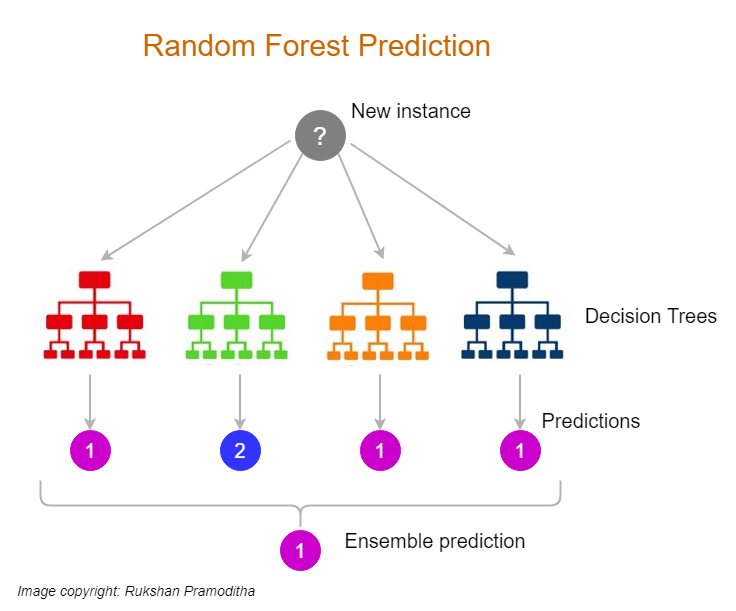

In [2]:
Image(filename='RF.png') 

## Vocabulary

__Wisdom of crowds:__ if many not-so-good estimates are averaged, their error can cancel out and produce a better result. Ensembe methods make use of the wisdom of crowds by averaging the results of many Classifiers/Regressors. 

__Weak learner:__ a predictor that is not much better than chance.

__Strong learner:__ a predictor that is much better than chance. 

__Ensemble:__ a buch of stuff (in our case this stuff will be ML models)

__Ensemble learning:__ A machine learning method where the predictions of many weak learners are averaged to build a stong learner. E.g train a lot of decison trees and average the results!

__Ensemble method:__ an machine learning algorithm that uses ensemble learning

__Hard voting:__ Used only in classification: The ensemble selects the class that the majority of it's components selected. Eg. if in a random forrest of 100 decision trees 66 trees decide that a sample comes from class A, and 34 trees decide the sample comes from class be,  the random forrest will say it comes from class A

__Soft voting:__ Used only in classification. Instead of choosing the class that was most frequently predicted, the ensemble chooses the class that has the highest average probability.

__Bagging:__ A way of creating training sets for the elements of an ensemble by sampling with replacement from the original dataset. e.g if the dataset has datapoints [1,2,3,4,5] the first tree might get the points [1,1,2,3], the second treee gets [2,2,3,3] etc.
    Bagging is short for "bootstrap aggregating"

__Pasting:__ A way of creating training sets for the elements of an ensemble by sampling without replacement from the original dataset. e.g if the dataset has datapoints [1,2,3,4,5] the first tree might get the points [1,2,3,4], the second treee gets [1,2,4,5] etc.
    
__Boosting:__ A method of training an ensemble by building one element after another and each one corrects the mistakes of the previous element. E.g. in AdaBoost we first train one tree and evlauate it. We give higher weight to the datapoints that it missclassified such that the next tree we train pays special attention to these datapoints.

__out of bag instances:__ When performing bagging or pasting a tree will not see all datapoint of the original dataset during training. The datapoints it does not see are called out of bag instances.

__oob_score:__ How well an element of the ensemble performs on those datapoints of the traingset that it did not see during training.

__Feature sampling:__ Insead of training each element of the ensemble on a subset of datapoints (e.g a subset of rows in the dataframe of training data) we can also train it on a subset of features (i.e columns). This is called feature sampling.

__Random patches method:__ Combining Bagging/Pasting with Feature sampling i.e each element of the ensemble gets a subset of datapoints from a subset of rows.

__Feature importance:__ How important a feature of the dataset is for making the classification/regression. Has values between 0 and 1. Can change depending on which algorithm you use. Can be helpful in deciding which features to exclude from the dataset

### Load the charity dataset

In [3]:
data_train = pd.read_csv("clean_charity_ml.csv")
data_train

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,45217,0.219178,0.800000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
45218,45218,0.301370,0.800000,0.000000,0.0,0.357143,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
45219,45219,0.287671,0.800000,0.000000,0.0,0.500000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
45220,45220,0.369863,0.800000,0.747375,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### prepare the training and testing sets

In [4]:
y = data_train['income']
X = data_train.drop(columns='income')
X = X.drop(columns='Unnamed: 0')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Recap 

##### Base Accuracy

In [5]:
1-np.mean(y_train)

0.7537662050474059

##### Single Decison Tree

In [6]:
dt_reg = DecisionTreeClassifier()
dt_reg.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
dt_reg.score(X_test, y_test)

0.8228855721393035

In [8]:
y_hat = dt_reg.predict(X_test)

In [9]:
acc_score = accuracy_score(y_test, y_hat)

In [10]:
acc_score

0.8228855721393035

### Random Forrest

#### initialize a random forrest classifier and fit it to the data

In [11]:
rf_clf = RandomForestClassifier(oob_score=True)

In [12]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

##### get the accuracy score and compare it to the base accuracy

In [13]:
rf_clf.score(X_test, y_test)

0.8430071862907684

###### Get a list of the trees in the forrest and plot a histogram of their length

In [14]:
trees = list(rf_clf.estimators_)

In [15]:
depths = [tree.get_depth() for tree in trees]


Text(0.5, 0, 'depth')

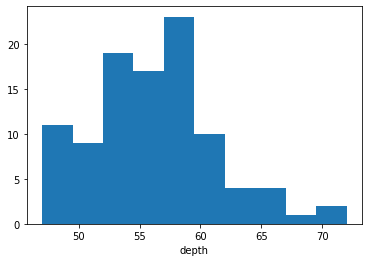

In [16]:
plt.hist(depths)
plt.xlabel("depth")

#### Check out what the random forrest attributes mean

definition of the base estimator (i.e a decision tree)

In [17]:
rf_clf.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The number of classes for prediction. Here 0 = "less than 50K" and 1 = "more than 50K"

In [18]:
rf_clf.classes_

array([0, 1], dtype=int64)

the mumber of features is the number of coumns in X_train

In [19]:
rf_clf.n_features_

103

In [20]:
X_train.shape

(36177, 103)

the oob score should be close to the accuracy score

In [21]:
print("oob score:", rf_clf.oob_score_)
print("test score:", rf_clf.score(X_test, y_test))

oob score: 0.8392625148575061
test score: 0.8430071862907684


## Feature Importance

##### get the five most important features

In [22]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns
for idx in np.argsort(importances)[::-1][:5]:
    print("{:40}{}".format(feature_names[idx], np.round(importances[idx], 2)))

age                                     0.23
hours-per-week                          0.11
capital-gain                            0.1
marital-status_ Married-civ-spouse      0.07
education-num                           0.06


#### be careful of taking feature importance too serious

"random forest variable importance measures are a sensible means for variable selection in many applications, but are not reliable in situations where potential predictor variables vary in their scale of measurement or their number of categories."

(Strobl, Carolin, et al. "Bias in random forest variable importance measures: Illustrations, sources and a solution." BMC bioinformatics 8.1 (2007): 1-21.)

"There are a few things to keep in mind when using the impurity based ranking. Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories (see Bias in random forest variable importance measures). Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable." (https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)


#### Let's figure out the optimal number of trees

In [23]:
def cumulative_accuracy(predictors, X_test,  y_test):
    
    np.random.shuffle(predictors)
    N = len(predictors)
    summed_prediction = np.zeros(len(y_test))
    acc_score = np.zeros(N)
    
    for i in range(N): 
        y_hat_new = predictors[i].predict(X_test)
        summed_prediction += y_hat_new
        averaged_prediction = summed_prediction/float(i+1)

        acc_score[i] = accuracy_score(y_test, (averaged_prediction>0.5).astype(int))
        
    return acc_score

Text(0, 0.5, 'Accuracy')

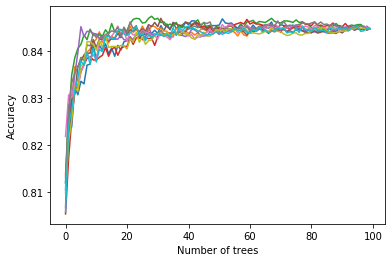

In [24]:
for k in range(10):
    plt.plot(cumulative_accuracy(rf_clf.estimators_, X_test, y_test))
    
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

the cumulative accuracy first increases very quickly and then stays more or less the same. Using around 40 to 50 trees is probably enough

# Ada Boost

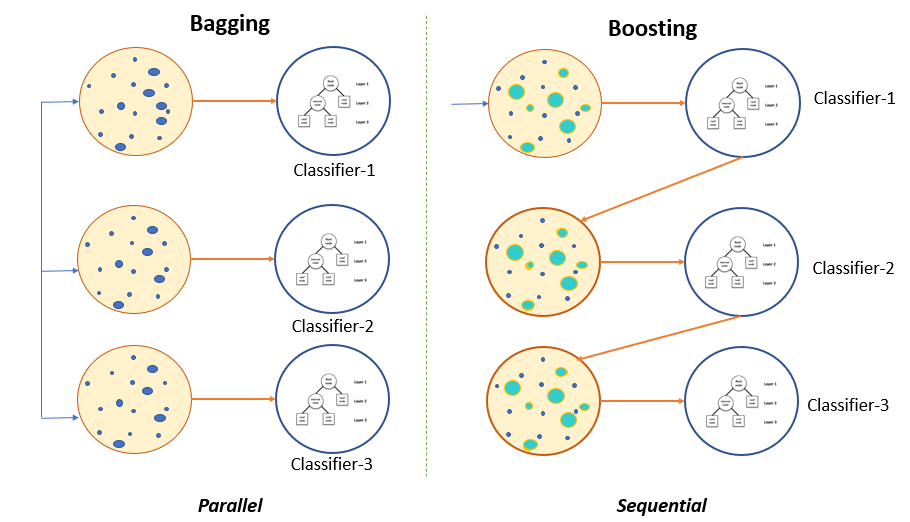

In [25]:
Image(filename='BaggingVsBoosting.png') 

#### Let's create an AdaBoost Classifier

In [26]:
ab_clf = AdaBoostClassifier(learning_rate=0.8, n_estimators=100, algorithm='SAMME')

#### staged_score

the staged score is simlar to the cumulative accuracy we calculated above

In [27]:
ab_clf = AdaBoostClassifier(learning_rate=0.8, n_estimators=100, algorithm='SAMME')

In [28]:
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)

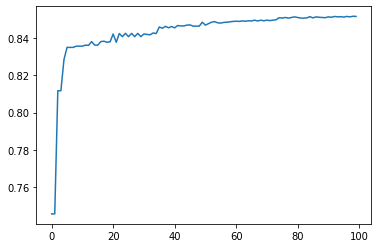

In [29]:
a = ab_clf.staged_score(X_test,  y_test)
plt.plot(list(a))

#### how do the feature impartances change?

In [30]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns
for idx in np.argsort(importances)[::-1][:5]:
    print("{:40}{}".format(feature_names[idx], np.round(importances[idx], 2)))

age                                     0.23
hours-per-week                          0.11
capital-gain                            0.1
marital-status_ Married-civ-spouse      0.07
education-num                           0.06


In [31]:
importances = ab_clf.feature_importances_
feature_names = X_train.columns
for idx in np.argsort(importances)[::-1][:5]:
    print("{:40}{}".format(feature_names[idx], np.round(importances[idx], 2)))

capital-gain                            0.3
marital-status_ Married-civ-spouse      0.18
education-num                           0.12
age                                     0.1
capital-loss                            0.09


#### Different Ensemble Methods create different decison boundaries

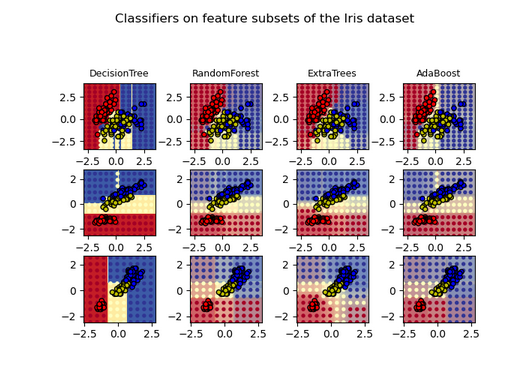

In [32]:
Image(filename='DecisionBoundaries.PNG') 

image from https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

### Let's make our own decision boundaries

In [33]:
def create_blob_data(centers=[(0,0), (0,1), (1,0), (1,1)], sigma=0.3, plot=True):
    X, y = make_blobs(centers=centers, cluster_std=sigma)
    labels = (y%3!=0).astype(int)
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])
    if plot:
        plt.scatter(X[:, 0], X[:,1], c=labels)
        plt.xlabel('$X_1$', size=16)
        plt.xlim(x_min-0.1*(x_max-x_min), x_max+0.1*(x_max-x_min))
        plt.ylabel('$X_2$', size=16)
        plt.ylim(y_min-0.1*(y_max-y_min), y_max+0.1*(y_max-y_min))
    
    features = pd.DataFrame({"x1":X[:,0], "x2":X[:,1]})
    targets = pd.DataFrame({"y":labels})
    return features, targets

In [34]:
def plot_decision_beundary(features, targets, predictor, res=30):
    x_min=features['x1'].min()
    x_max=features['x1'].max()    
    y_min=features['x2'].min()
    y_max=features['x2'].max()
    
    xx = np.linspace(x_min, x_max, res)
    yy = np.linspace(y_min,y_max, res)
    xv, yv = np.meshgrid(xx,yy)
    mesh = np.vstack((xv.flatten(), yv.flatten())).T
    pred = predictor.predict(mesh)
    
    cs = plt.contourf(xv,yv, pred.reshape(xv.shape), cmap=plt.cm.coolwarm)
    
    plt.colorbar()
    plt.scatter(features['x1'], features['x2'], c=targets['y'])
    plt.xlabel('$X_1$', size=16)
    plt.xlim(x_min-0.1*(x_max-x_min), x_max+0.1*(x_max-x_min))
    plt.ylabel('$X_2$', size=16)
    plt.ylim(y_min-0.1*(y_max-y_min), y_max+0.1*(y_max-y_min))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

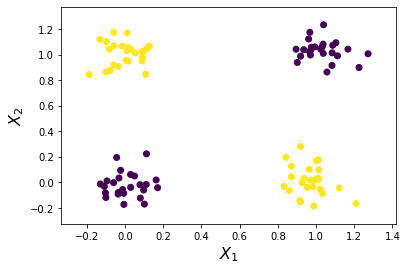

In [35]:
features, targets= create_blob_data(sigma=0.1)
clf = DecisionTreeClassifier()
clf.fit(features, targets)

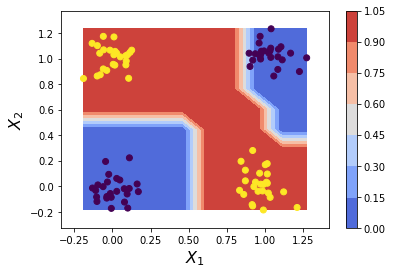

In [36]:
plot_decision_beundary(features, targets, clf, res=10)

### Summary Baggin vs Boosting

There’s not an outright winner; it depends on the data, the simulation and the circumstances. Bagging and Boosting decrease the variance of your single estimate as they combine several estimates from different models. So the result may be a model with higher stability.

If the problem is that the single model gets a very low performance, Bagging will rarely get a better bias. However, Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls of the single model.

By contrast, if the difficulty of the single model is over-fitting, then Bagging is the best option. Boosting for its part doesn’t help to avoid over-fitting; in fact, this technique is faced with this problem itself. For this reason, Bagging is effective more often than Boosting.

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/


# Gradient Boost

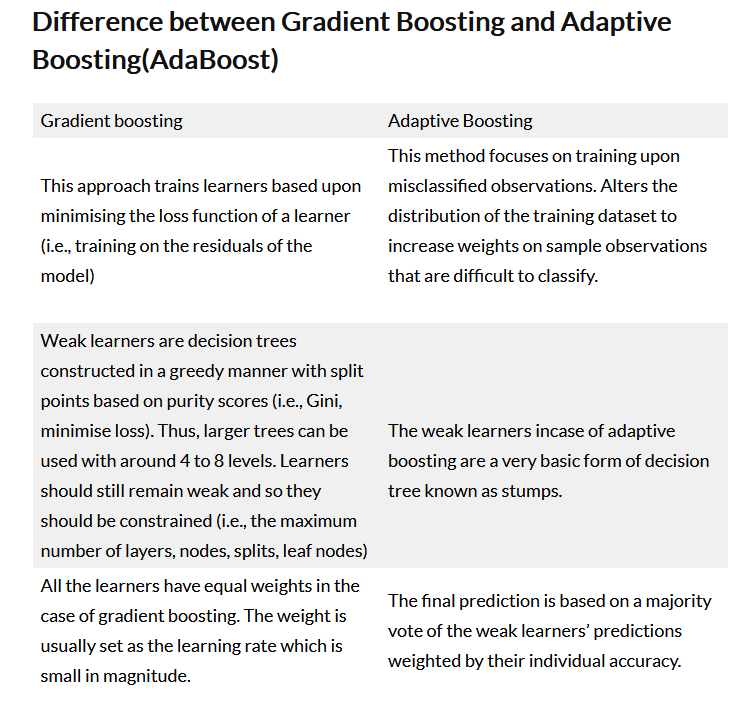

In [37]:
Image(filename='GradientVsAda.PNG') 

Gradient Boosting is more intuitive for regression problems, so we create a small toy dataset

In [38]:
def make_data(N=100):
    x= np.linspace(-1,1,N)
    y = 2*(x**2)+np.random.normal(loc=0, scale=0.3, size=N)
    return x.reshape(len(x),1), y

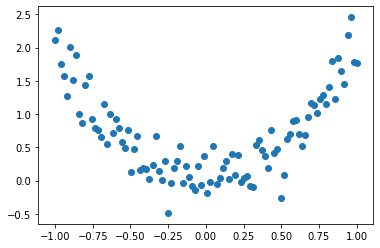

In [39]:
x,y = make_data()
plt.scatter(x,y)

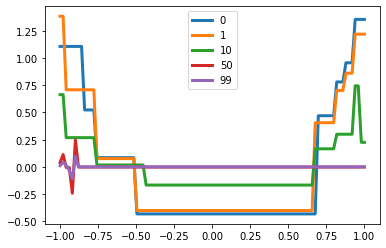

In [40]:
gb_clf = GradientBoostingRegressor()
gb_clf.fit(x,y)
ests = gb_clf.estimators_
for i in [0, 1, 10,  50, 99]:
    plt.plot(x, ests[i][0].predict(x), linewidth=3, label=str(i))
    
plt.legend()

### Some more resources

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

https://medium.com/datadriveninvestor/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10

https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

https://www.mygreatlearning.com/blog/gradient-boosting/